### 사고심도 모델링
##### 가상의 손해액 데이터를 두 가지 분포(Normal, Gamma)로 피팅(fitting) 해보기
* csv 파일 불러오기
* 데이터 시각화: histogram, line plot
* 피팅 (.fit)
* 확률밀도 계산 (.pdf)
* 몬테카를로 시뮬레이션 (.rvs)
* 간단한 numpy 기능

In [1]:
# 모듈 불러오기 (numpy, matplotlib)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
claim = np.loadtxt('data/claim.csv')

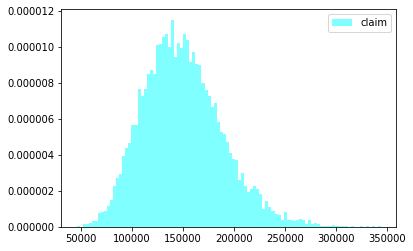

In [3]:
# 히스토그램 그리기
plt.hist(
    x=claim,            # 데이터
    bins=100,           # 히스토그램 분할 수
    density=True,       # 세로축 표시 방법(True : 빈도, False : 건수)
    color='aqua',       # 색깔. 구글에 "matplotlib color" 라고 검색하면 사용가능한 컬러명 목록이 나온다.
    label='claim',      # 라벨. 아래처럼 "plt.legend()" 도 넣어줘야 보인다.
    alpha=0.5,          # 투명도(0~1). 0으로 갈수록 투명해짐
)
plt.legend()
plt.show()

### 1) Normal distribution

_The probability density function (pdf) of the **Normal** distribution_
\begin{align}
    f(x) &= \frac{1}{\sqrt{2\pi\sigma^2}}\exp{(-\frac{(x-\mu)^2}{2\sigma^2}})\quad (-\infty <x< \infty) \\
\end{align}

In [4]:
#1-1) 모듈 불러오기 (Normal distribution)
from scipy.stats import norm

In [5]:
#1-2) 모수 추정
mu, sigma = norm.fit(claim)
print(f'Normal dist. 추정모수: mu={mu:.1f}, sigma={sigma:.1f}')

Normal dist. 추정모수: mu=150021.9, sigma=38706.1


In [6]:
#1-3) 심도 모델 생성
sev_model_normal = norm(loc=mu, scale=sigma)
x = np.linspace(0, 350000, 10000)             # 0부터 350000을 10000개로 균등분할한 수열 생성
fx = sev_model_normal.pdf(x)                       # 각 x에 대해 f(x) 값 계산

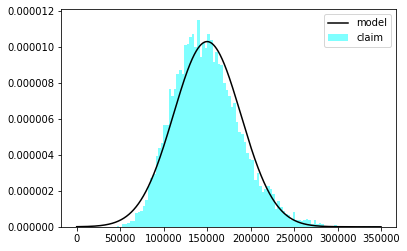

In [7]:
#1-4) pdf(probability density function) 시각화
plt.plot(x, fx, label='model', color='black')
plt.hist(x=claim, bins=100, density=True, color='aqua', label='claim', alpha=0.5)
plt.legend()
plt.show()

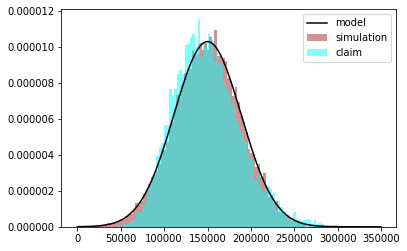

In [8]:
#1-5) 몬테카를로 시뮬레이션
claim_generated = sev_model_normal.rvs(20000)
plt.hist(x=claim_generated, bins=100, density=True, color='brown', label='simulation', alpha=0.5)
plt.plot(x, fx, label='model', color='black')
plt.hist(x=claim, bins=100, density=True, color='aqua', label='claim', alpha=0.5)
plt.legend()
plt.show()

In [9]:
#1-6) 로그우도 계산
loglik_normal = sev_model_normal.logpdf(claim).sum()
print(f"Normal dist.의 LogL: {loglik_normal:.0f}")

Normal dist.의 LogL: -119827


### 2) Gamma distribution

_The probability density function (pdf) of the **Gamma** distribution_
\begin{align}
    f(x, a) &= \frac{1}{\sigma\Gamma(a)}(\frac{x-\mu}{\sigma})^{a-1}e^{-(x-\mu)/\sigma}\quad (x > \mu,\; a>0) \\
\end{align}

In [10]:
#2-1) 모듈 불러오기 (Gamma distribution)
from scipy.stats import gamma

In [11]:
#2-2) 모수 추정
a, mu, sigma = gamma.fit(claim)
print(f'Gamma dist. 추정모수: a={a:.1f}, mu={mu:.1f}, sigma={sigma:.1f}')

Gamma dist. 추정모수: a=13.9, mu=6059.4, sigma=10388.3


In [12]:
#2-3) 심도 모델 생성
sev_model_gamma = gamma(a=a, loc=mu, scale=sigma)
x = np.linspace(0, 350000, 10000)
fx = sev_model_gamma.pdf(x)

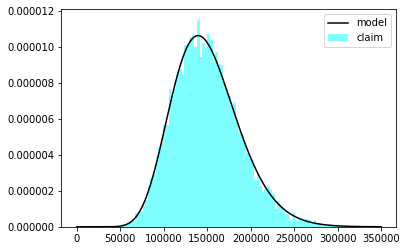

In [13]:
#2-4) pdf(probability density function) 시각화
plt.plot(x, fx, label='model', color='black')
plt.hist(x=claim, bins=100, density=True, color='aqua', label='claim', alpha=0.5)
plt.legend()
plt.show()

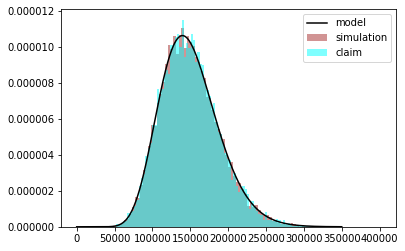

In [14]:
#2-5) 몬테카를로 시뮬레이션
claim_generated = sev_model_gamma.rvs(20000)
plt.hist(x=claim_generated, bins=100, density=True, color='brown', label='simulation', alpha=0.5)
plt.plot(x, fx, label='model', color='black')
plt.hist(x=claim, bins=100, density=True, color='aqua', label='claim', alpha=0.5)
plt.legend()
plt.show()

In [15]:
#2-6) 로그우도 계산
loglik_gamma = sev_model_gamma.logpdf(claim).sum()
print(f"Gamma dist.의 LogL: {loglik_gamma:.0f}")

Gamma dist.의 LogL: -119573
